<a href="https://colab.research.google.com/github/ssoad/food_image_classification/blob/main/Food_101%20RestNet50%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mount Google Drive to Save Model for Future use

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Download and Preprocessing

In [ ]:
#loaded kaggle.jsonfile
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sohanuzzamansoad","key":"524d2df12506eea7dcae85650daed198"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#downloaded kaggle dataset
!kaggle datasets download -d kmader/food41

100% 5.30G/5.30G [00:28<00:00, 207MB/s]
100% 5.30G/5.30G [00:28<00:00, 198MB/s]


In [ ]:
!unzip food41.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/tacos/1026681.jpg  
  inflating: images/tacos/1030289.jpg  
  inflating: images/tacos/1033196.jpg  
  inflating: images/tacos/1036030.jpg  
  inflating: images/tacos/1042175.jpg  
  inflating: images/tacos/1044043.jpg  
  inflating: images/tacos/1058697.jpg  
  inflating: images/tacos/1059239.jpg  
  inflating: images/tacos/1059326.jpg  
  inflating: images/tacos/1066762.jpg  
  inflating: images/tacos/1070967.jpg  
  inflating: images/tacos/1073468.jpg  
  inflating: images/tacos/1075296.jpg  
  inflating: images/tacos/1085243.jpg  
  inflating: images/tacos/108529.jpg  
  inflating: images/tacos/1086014.jpg  
  inflating: images/tacos/108945.jpg  
  inflating: images/tacos/1089575.jpg  
  inflating: images/tacos/1091159.jpg  
  inflating: images/tacos/1101369.jpg  
  inflating: images/tacos/1109058.jpg  
  inflating: images/tacos/1109744.jpg  
  inflating: images/tacos/1119371.jpg  
  inflating: images/tacos/11237

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.

splitfolders.ratio("images/", output="/content/drive/MyDrive/Food Recognition/Dataset", seed=1337, ratio=(.8, .2), group_prefix=None) # default values

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
#splitfolders.fixed("DATASET1/", output="OUTPUT1", seed=1337, fixed=(100, 100), oversample=False, group_prefix=None) # default values

Streaming output truncated to the last 5000 lines.
Copying files: 62176 files [14:49, 64.72 files/s]
Copying files: 62183 files [14:50, 65.64 files/s]
Copying files: 62190 files [14:50, 66.83 files/s]
Copying files: 62197 files [14:50, 65.36 files/s]
Copying files: 62206 files [14:50, 67.64 files/s]
Copying files: 62213 files [14:50, 62.81 files/s]
Copying files: 62221 files [14:50, 65.71 files/s]
Copying files: 62228 files [14:50, 58.15 files/s]
Copying files: 62236 files [14:50, 63.40 files/s]
Copying files: 62243 files [14:51, 60.89 files/s]
Copying files: 62250 files [14:51, 62.77 files/s]
Copying files: 62257 files [14:51, 64.71 files/s]
Copying files: 62265 files [14:51, 68.35 files/s]
Copying files: 62272 files [14:51, 66.24 files/s]
Copying files: 62279 files [14:51, 63.89 files/s]
Copying files: 62286 files [14:51, 62.79 files/s]
Copying files: 62293 files [14:51, 64.10 files/s]
Copying files: 62300 files [14:51, 65.04 files/s]
Copying files: 62309 files [14:52, 71.71 files/s]

In [ ]:
import os
data_dir = '/content/drive/MyDrive/Food Recognition/Dataset'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'val']
['waffles', 'clam_chowder', 'pizza', 'deviled_eggs', 'fried_rice', 'ceviche', 'beef_tartare', 'pho', 'ramen', 'mussels', 'beet_salad', 'lobster_roll_sandwich', 'takoyaki', 'macarons', 'frozen_yogurt', 'nachos', 'grilled_cheese_sandwich', 'chocolate_cake', 'chicken_curry', 'hot_and_sour_soup', 'caesar_salad', 'miso_soup', 'pad_thai', 'lobster_bisque', 'pulled_pork_sandwich', 'cheese_plate', 'apple_pie', 'omelette', 'club_sandwich', 'croque_madame', 'shrimp_and_grits', 'caprese_salad', 'oysters', 'baby_back_ribs', 'onion_rings', 'bibimbap', 'french_onion_soup', 'spaghetti_bolognese', 'sushi', 'hamburger', 'garlic_bread', 'gyoza', 'grilled_salmon', 'french_fries', 'creme_brulee', 'carrot_cake', 'red_velvet_cake', 'cheesecake', 'tiramisu', 'peking_duck', 'chocolate_mousse', 'bread_pudding', 'panna_cotta', 'chicken_quesadilla', 'steak', 'falafel', 'foie_gras', 'donuts', 'fried_calamari', 'prime_rib', 'ravioli', 'macaroni_and_cheese', 'crab_cakes', 'greek_salad', 'cannoli', 

In [5]:
classes = ['waffles', 'clam_chowder', 'pizza', 'deviled_eggs', 'fried_rice', 'ceviche', 'beef_tartare', 'pho', 'ramen', 'mussels', 'beet_salad', 'lobster_roll_sandwich', 'takoyaki', 'macarons', 'frozen_yogurt', 'nachos', 'grilled_cheese_sandwich', 'chocolate_cake', 'chicken_curry', 'hot_and_sour_soup', 'caesar_salad', 'miso_soup', 'pad_thai', 'lobster_bisque', 'pulled_pork_sandwich', 'cheese_plate', 'apple_pie', 'omelette', 'club_sandwich', 'croque_madame', 'shrimp_and_grits', 'caprese_salad', 'oysters', 'baby_back_ribs', 'onion_rings', 'bibimbap', 'french_onion_soup', 'spaghetti_bolognese', 'sushi', 'hamburger', 'garlic_bread', 'gyoza', 'grilled_salmon', 'french_fries', 'creme_brulee', 'carrot_cake', 'red_velvet_cake', 'cheesecake', 'tiramisu', 'peking_duck', 'chocolate_mousse', 'bread_pudding', 'panna_cotta', 'chicken_quesadilla', 'steak', 'falafel', 'foie_gras', 'donuts', 'fried_calamari', 'prime_rib', 'ravioli', 'macaroni_and_cheese', 'crab_cakes', 'greek_salad', 'cannoli', 'sashimi', 'beef_carpaccio', 'cup_cakes', 'seaweed_salad', 'eggs_benedict', 'escargots', 'hummus', 'gnocchi', 'tuna_tartare', 'pork_chop', 'spaghetti_carbonara', 'strawberry_shortcake', 'guacamole', 'paella', 'huevos_rancheros', 'fish_and_chips', 'french_toast', 'bruschetta', 'beignets', 'pancakes', 'chicken_wings', 'baklava', 'poutine', 'breakfast_burrito', 'edamame', 'dumplings', 'churros', 'lasagna', 'samosa', 'risotto', 'ice_cream', 'filet_mignon', 'hot_dog', 'spring_rolls', 'scallops', 'tacos']
classes.sort()
print(classes)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

### Model Implementation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision.models.resnet import resnet50

In [6]:
train_transforms = torchvision.transforms.Compose([
        torchvision.transforms.ColorJitter(brightness=0.1,contrast=0.1,saturation=0.1),
        torchvision.transforms.RandomAffine(15),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.RandomRotation(15),
        torchvision.transforms.Resize((224,224)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
valid_transforms = torchvision.transforms.Compose([
        torchvision.transforms.Resize((224,224)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

In [ ]:
train_dataset = torchvision.datasets.ImageFolder(data_dir + '/train',transform=train_transforms)
valid_dataset = torchvision.datasets.ImageFolder(data_dir + '/val',transform=valid_transforms)

In [ ]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size,shuffle=True,num_workers=2,pin_memory=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset,batch_size,shuffle=False,num_workers=2,pin_memory=True)

In [ ]:
def visualize_images(dataloader):
    mean=np.array([0.485, 0.456, 0.406])
    std=np.array([0.229, 0.224, 0.225])
    figure, ax = plt.subplots(nrows=10, ncols=10, figsize=(20, 30))
    classes = list(dataloader.dataset.class_to_idx.keys())
    img_no = 0
    for images,labels in dataloader:
        for i in range(10):
            for j in range(10):
                img = np.array(images[img_no]).transpose(1,2,0)
                lbl = labels[img_no]

                ax[i,j].imshow((img*std) + mean)
                ax[i,j].set_title(classes[lbl])
                ax[i,j].set_axis_off()
                img_no+=1
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

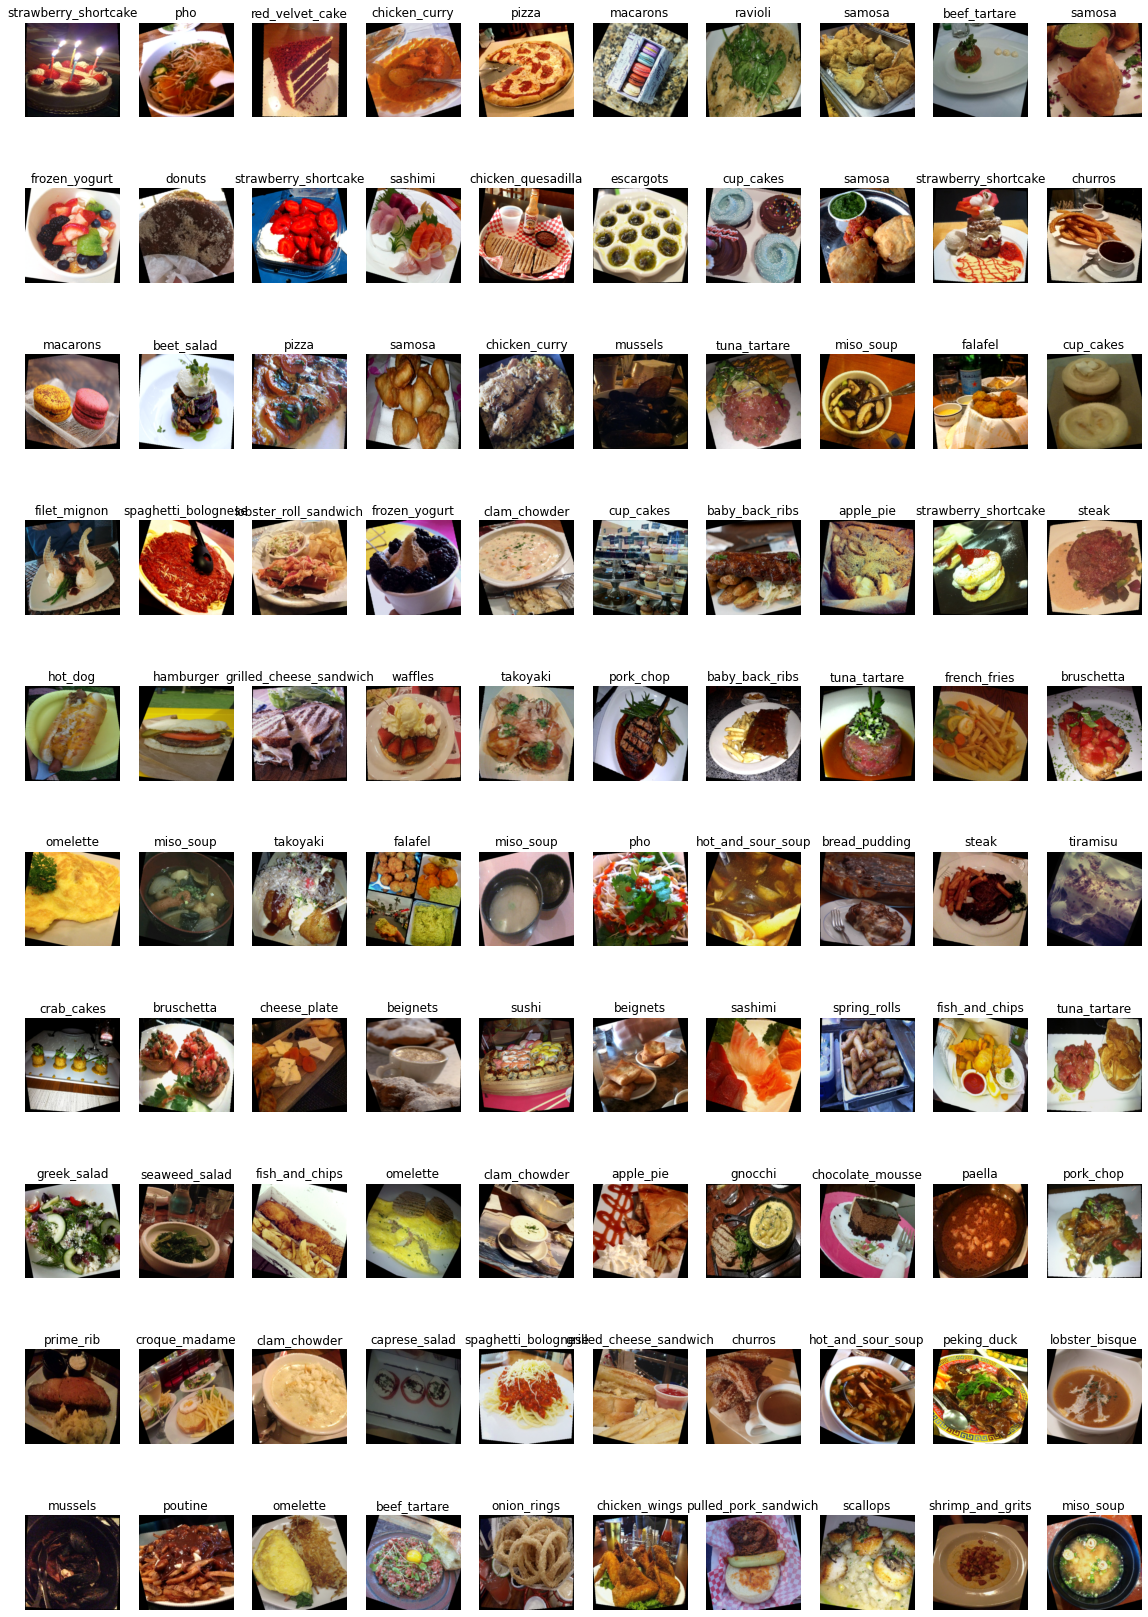

In [ ]:
visualize_images(train_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

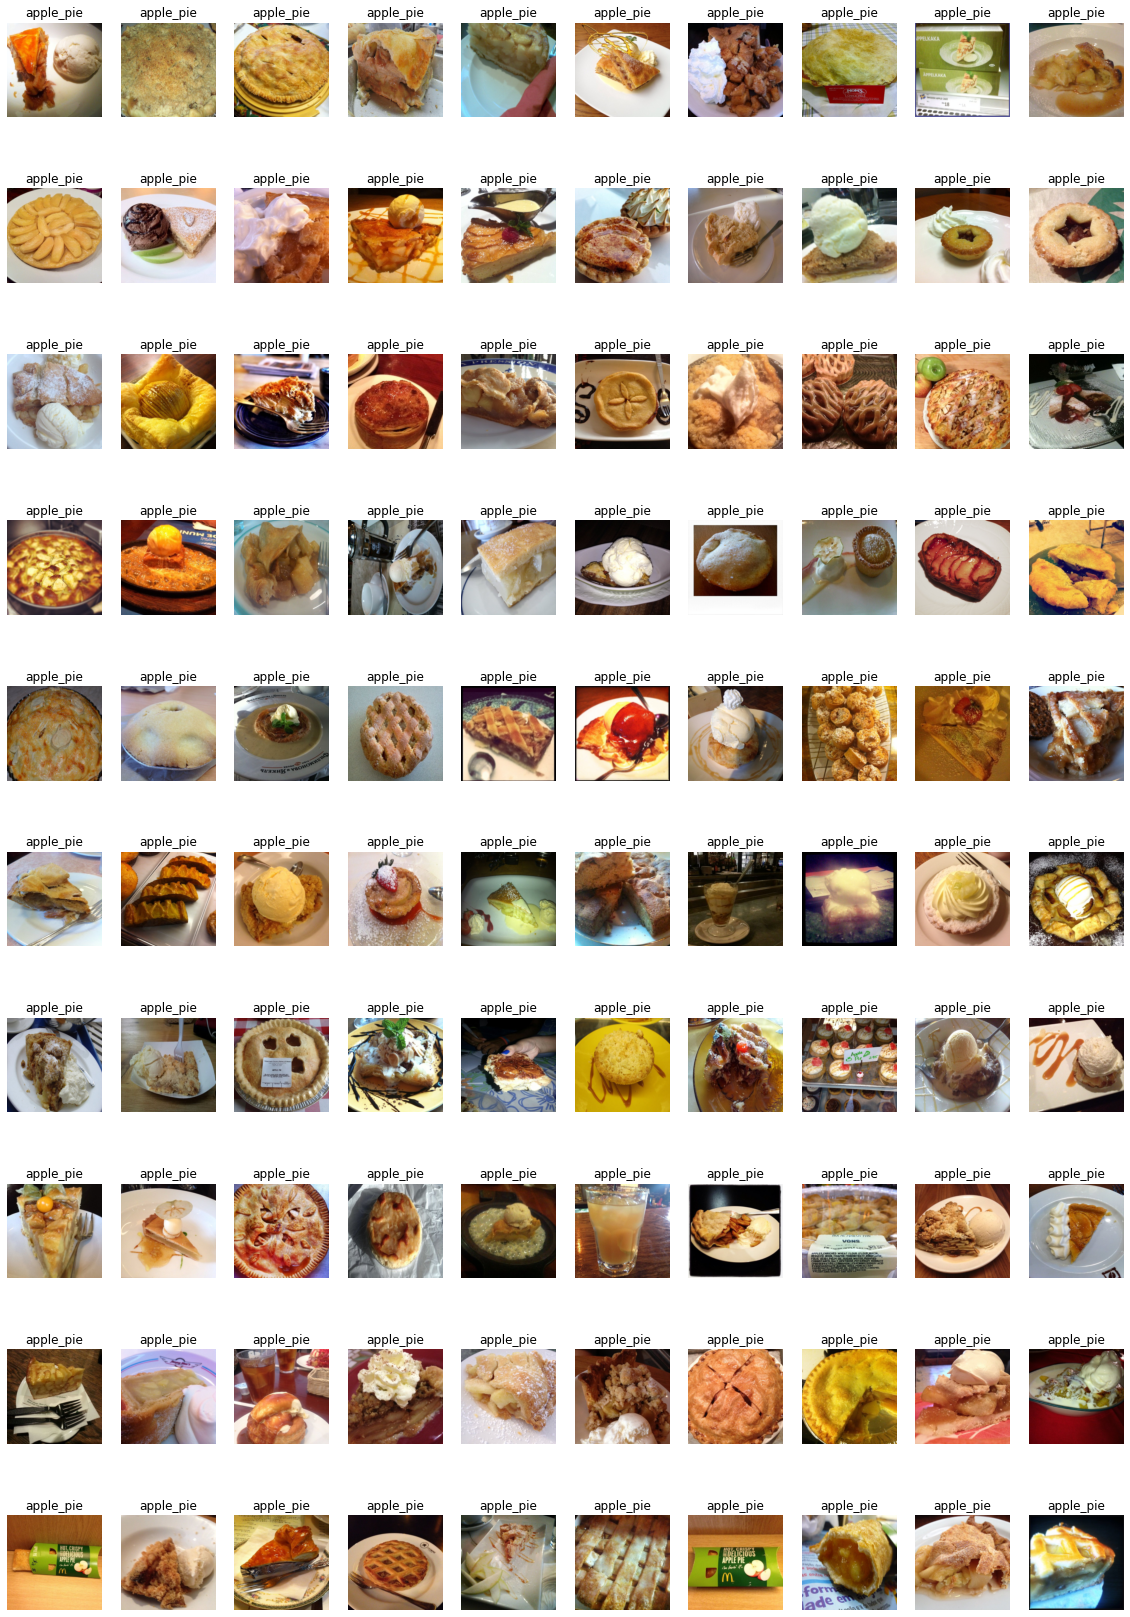

In [ ]:
visualize_images(valid_loader)

In [7]:
model = resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [8]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
# Freeze first few layers. You can try different values instead of 100
for i,param in enumerate(model.parameters()):
    if i<100:
        param.requires_grad=False

In [13]:
model.fc = torch.nn.Sequential(
    torch.nn.Dropout(0.5),
    torch.nn.Linear(2048,101)
)

### Calculate Learning Rate

  0%|          | 0/25 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.83E-04


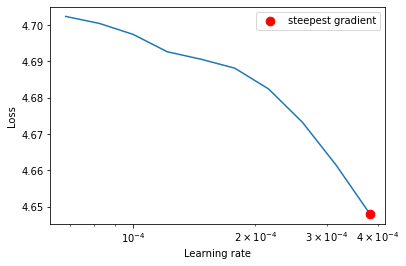

In [ ]:
!pip3 install torch_lr_finder
from torch_lr_finder import LRFinder
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=0.001, num_iter=25)
lr_finder.plot()
lr_finder.reset()

### Model Training

In [ ]:
cuda = True
epochs = 10
model_name = '/content/drive/MyDrive/Food Recognition/resnet50.pt'
#model_name = '/content/resnet50_new.pt'
optimizer = torch.optim.Adam(model.parameters(),lr=4e-5,weight_decay=0.001)
criterion = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor=0.1,patience=1,verbose=True)

writer = SummaryWriter() # For Tensorboard
early_stop_count=0
ES_patience=5
best = 0.0
if cuda:
    model.cuda()

for epoch in range(epochs):
    
    # Training
    model.train()
    correct = 0
    train_loss = 0.0
    tbar = tqdm(train_loader, desc = 'Training', position=0, leave=True)
    for i,(inp,lbl) in enumerate(tbar):
        optimizer.zero_grad()
        if cuda:
            inp,lbl = inp.cuda(),lbl.cuda()
        out = model(inp)
        loss = criterion(out,lbl)
        train_loss += loss
        out = out.argmax(dim=1)
        correct += (out == lbl).sum().item()
        loss.backward()
        optimizer.step()
        tbar.set_description(f"Epoch: {epoch+1}, loss: {loss.item():.5f}, acc: {100.0*correct/((i+1)*train_loader.batch_size):.4f}%")
    train_acc = 100.0*correct/len(train_loader.dataset)
    train_loss /= (len(train_loader.dataset)/batch_size)

    # Validation
    model.eval()
    with torch.no_grad():
        correct = 0
        val_loss = 0.0
        vbar = tqdm(valid_loader, desc = 'Validation', position=0, leave=True)
        for i,(inp,lbl) in enumerate(vbar):
            if cuda:
                inp,lbl = inp.cuda(),lbl.cuda()
            out = model(inp)
            val_loss += criterion(out,lbl)
            out = out.argmax(dim=1)
            correct += (out == lbl).sum().item()
        val_acc = 100.0*correct/len(valid_loader.dataset)
        val_loss /= (len(valid_loader.dataset)/batch_size)
    print(f'\nEpoch: {epoch+1}/{epochs}')
    print(f'Train loss: {train_loss}, Train Accuracy: {train_acc}')
    print(f'Validation loss: {val_loss}, Validation Accuracy: {val_acc}\n')

    scheduler.step(val_loss)

    # write to tensorboard
    writer.add_scalar("Loss/train", train_loss, epoch)
    writer.add_scalar("Loss/val", val_loss, epoch)
    writer.add_scalar("Accuracy/train", train_acc, epoch)
    writer.add_scalar("Accuracy/val", val_acc, epoch)

    if val_acc>best:
        best=val_acc
        torch.save(model,model_name)
        early_stop_count=0
        print('Accuracy Improved, model saved.\n')
    else:
        early_stop_count+=1

    if early_stop_count==ES_patience:
        print('Early Stopping Initiated...')
        print(f'Best Accuracy achieved: {best:.2f}% at epoch:{epoch-ES_patience}')
        print(f'Model saved as {model_name}')
        break
    writer.flush()
# writer.close()

Validation: 100%|██████████| 158/158 [03:59<00:00,  1.52s/it]



Epoch: 1/10
Train loss: 2.6159565448760986, Train Accuracy: 42.853960396039604
Validation loss: 1.468984603881836, Validation Accuracy: 65.4950495049505

Accuracy Improved, model saved.



Validation: 100%|██████████| 158/158 [03:53<00:00,  1.48s/it]



Epoch: 2/10
Train loss: 1.2961641550064087, Train Accuracy: 68.10148514851485
Validation loss: 1.0764834880828857, Validation Accuracy: 72.68316831683168

Accuracy Improved, model saved.



Epoch: 3, loss: 1.01019, acc: 74.9106%:  88%|████████▊ | 559/632 [28:22<03:21,  2.75s/it]

### Results Analysis

In [ ]:
!kill 330
%reload_ext tensorboard
%tensorboard --logdir runs

### Save and Load Model

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
torch.save(model.state_dict(), "/content/Dataset/model.pth")

In [31]:
model.load_state_dict(torch.load("/content/model (1).pth",map_location='cpu'))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Testing and Evaluation

In [16]:
!pip install Pillow

In [17]:
from PIL import Image

In [33]:
# Process our image
def process_image(image_path):
    # Load Image
    img = Image.open(image_path)
    
    # Get the dimensions of the image
    width, height = img.size
    
    # Resize by keeping the aspect ratio, but changing the dimension
    # so the shortest size is 255px
    img = img.resize((255, int(255*(height/width))) if width < height else (int(255*(width/height)), 255))
    
    # Get the dimensions of the new image size
    width, height = img.size
    
    # Set the coordinates to do a center crop of 224 x 224
    left = (width - 224)/2
    top = (height - 224)/2
    right = (width + 224)/2
    bottom = (height + 224)/2
    img = img.crop((left, top, right, bottom))
    
    # Turn image into numpy array
    img = np.array(img)
    
    # Make the color channel dimension first instead of last
    img = img.transpose((2, 0, 1))
    
    # Make all values between 0 and 1
    img = img/255
    
    # Normalize based on the preset mean and standard deviation
    img[0] = (img[0] - 0.485)/0.229
    img[1] = (img[1] - 0.456)/0.224
    img[2] = (img[2] - 0.406)/0.225
    
    # Add a fourth dimension to the beginning to indicate batch size
    img = img[np.newaxis,:]
    
    # Turn into a torch tensor
    image = torch.from_numpy(img)
    image = image.float()
    return image

In [44]:
# Using our model to predict the label
def predict(image, model):
    # Pass the image through our model
    image = image.to('cpu')
    output = model(image)
    
    # Reverse the log function in our output
    output = torch.exp(output)
    
    # Get the top predicted class, and the output percentage for
    # that class
    probs, classes = output.topk(1, dim=1)
    return 100 if probs.item()>100 else probs.item(), classes.item()

In [40]:
# Show Image
def show_image(image):
    # Convert image to numpy
    image = image.numpy()
    
    # Un-normalize the image
    image[0] = image[0] * 0.226 + 0.445
    
    # Print the image
    fig = plt.figure(figsize=(25, 4))
    plt.imshow(np.transpose(image[0], (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The model is  100 % certain that the image is  hamburger


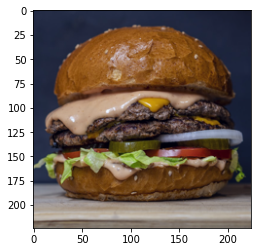

In [45]:
# Process Image
#image = process_image("mac.jpeg")
image = process_image("/content/burger.jpg")
# Give image to model to predict output
top_prob, top_class = predict(image, model)
# Show the image
show_image(image)
if top_class in range(0,102):
  c = classes[top_class]
else:
  c = "non_food"
# Print the results
print("The model is ", top_prob, "% certain that the image is ", c  )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The model is  9.555845260620117 % certain that the image is  non_food


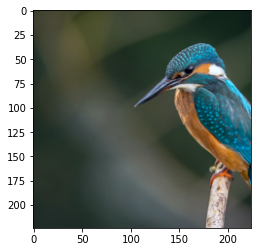

In [47]:
# Process Image
#image = process_image("mac.jpeg")
image = process_image("/content/bird.jpg")
# Give image to model to predict output
top_prob, top_class = predict(image, model)
# Show the image
show_image(image)
if top_class in range(0,102) and top_prob>50:
  c = classes[top_class]
else:
  c = "non_food"
# Print the results
print("The model is ", top_prob, "% certain that the image is ", c  )